<a href="https://colab.research.google.com/github/kharisecario/practice/blob/gh-pages/demo_PPG_signal_data_find_peak_and_segment_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install heartpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
# read the demo dataset
df=pd.read_csv('https://raw.githubusercontent.com/CGproject-record/ppg_wave_find_peak_segment/main/cgmh_icu_demo.csv')
df

,Unnamed: 0,index,II,ABP,PLETH,RESP,RESP,HR,PULSE,SpO2,NBP SYS,NBP DIAS,NBP MEAN,PlsNBP,ABP SYS,ABP DIAS,ABP MEAN,sumpt
0,0,2022-06-15 06:18:42.008,104.0,149.0,178.0,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022-06-15 06:18:42.016,104.0,149.0,178.0,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2022-06-15 06:18:42.024,104.0,149.0,179.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2022-06-15 06:18:42.032,104.0,148.0,179.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2022-06-15 06:18:42.040,103.0,147.0,179.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2022-06-15 06:19:21.968,94.0,214.0,80.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,4996,2022-06-15 06:19:21.976,93.0,214.0,80.0,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4997,2022-06-15 06:19:21.984,95.0,213.0,79.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4998,2022-06-15 06:19:21.992,96.0,212.0,79.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#inspect the data of Arterial blood pressure
bp_signal = df['ABP']
bp_signal

0       149.0
1       149.0
2       149.0
3       148.0
4       147.0
        ...  
4995    214.0
4996    214.0
4997    213.0
4998    212.0
4999    211.0
Name: ABP, Length: 5000, dtype: float64

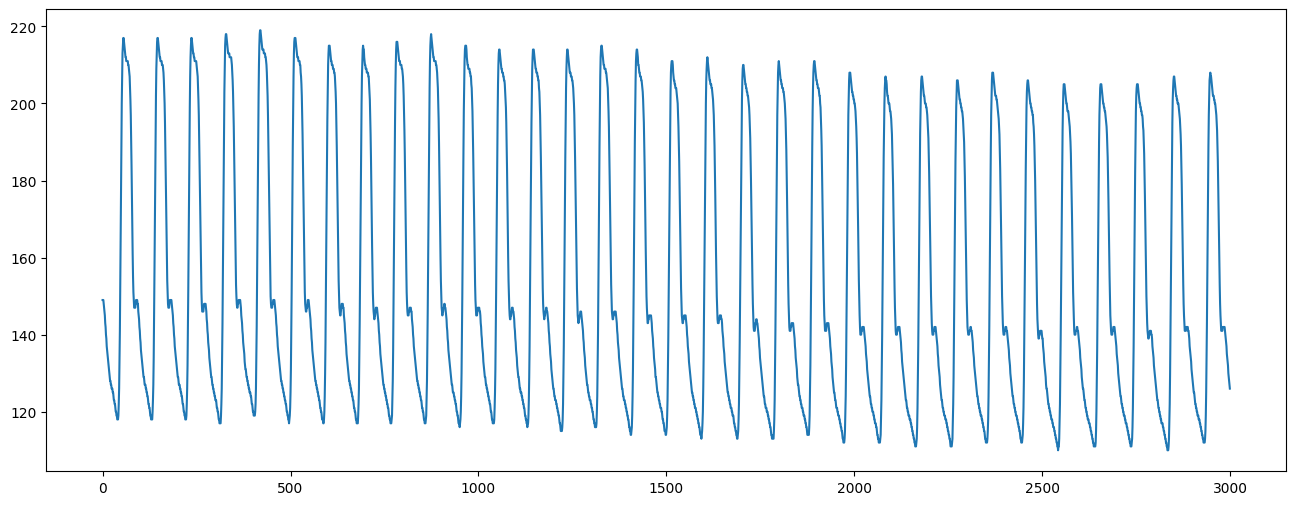

In [ ]:
#and visualise
ex_signal = bp_signal[0:3000]
plt.figure(figsize=(16,6))
plt.plot(ex_signal)
plt.show()

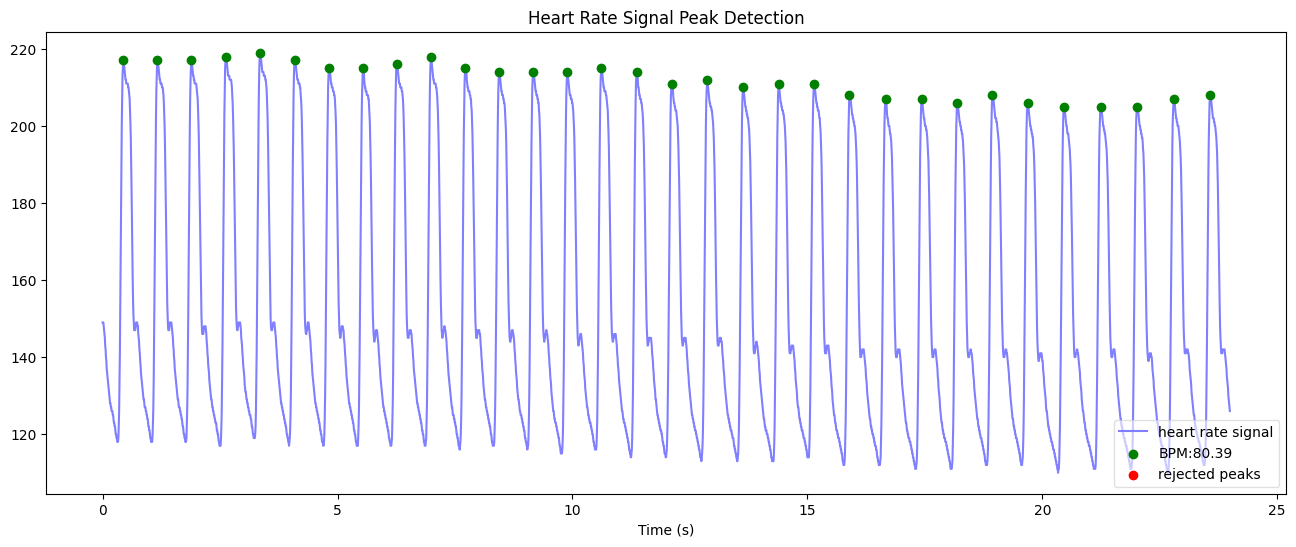

In [ ]:
#run the analysis
wd, m = hp.process(ex_signal, sample_rate = fs)

##call plotter
hp.plotter(wd, m,figsize = (16,6))

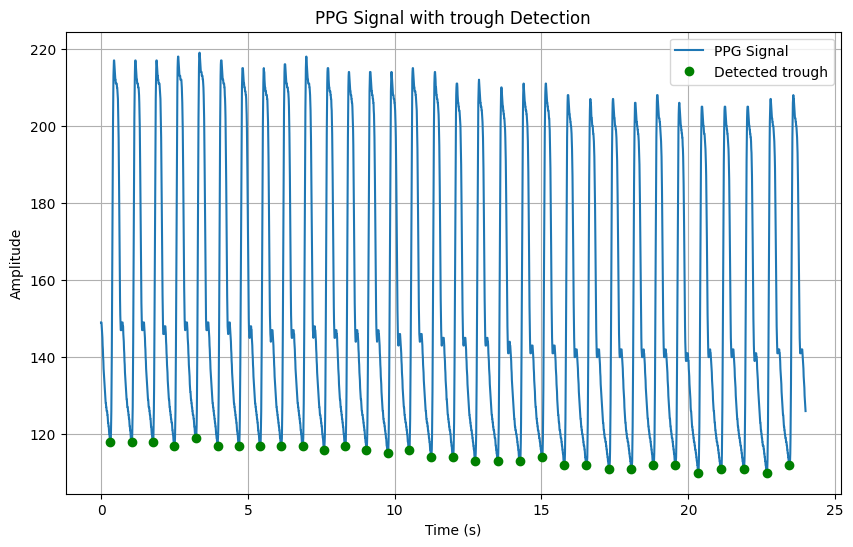

In [ ]:
## Plot the original signal and the detected trough
fs = 125
fs = fs  # Sampling frequency (Hz)
t = np.arange(0, round(len(ex_signal)/fs), 1/fs)  # Time vector
ppg_signal = ex_signal

# Find trough in the inverted PPG signal
trough, _ = find_peaks(-ppg_signal,distance=fs//2)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, ppg_signal, label='PPG Signal')
plt.plot(t[trough], ppg_signal.iloc[trough], 'go', label='Detected trough')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PPG Signal with trough Detection')
plt.legend()
plt.grid()
plt.show()

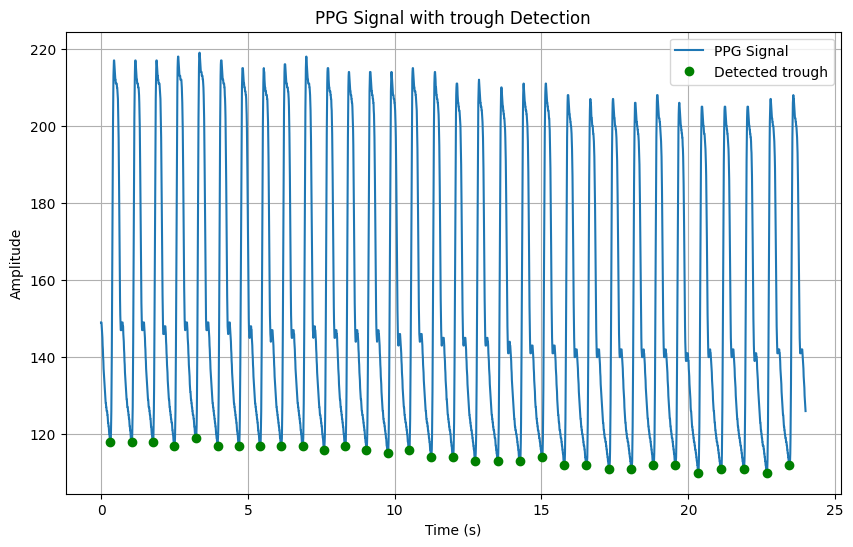

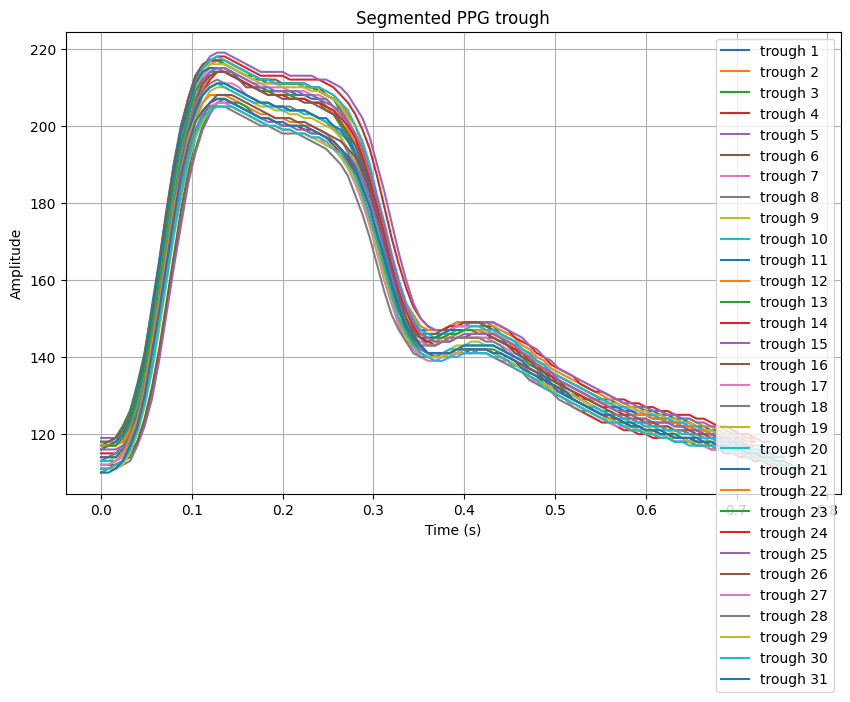

In [ ]:
# Calculate the intervals between trough
trough_intervals = np.diff(t[trough])

# Segment the PPG signal based on valley intervals
segments = []
for i in range(len(trough) - 1):
    segment = ppg_signal[trough[i]:trough[i + 1]]
    segments.append(segment)

# Plot each segmented wave (valley)
plt.figure(figsize=(10, 6))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Segmented PPG trough')
for i, segment in enumerate(segments):
    plt.plot(np.arange(0, len(segment))/fs, segment, label=f'trough {i + 1}')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Your turn! try other signals!